# Data example: Wernle 2018


In this notbook we provide easy example on how access to the experimental results such as Neural recording, behaviours, etc... 

    - To plot a tetrode recording call .plot_recording_tetr(index)
    - To plot the trajectory recording call .plot_trajectory(index)
    - To get access to the expeimental details call .show_keys()

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from neuralplayground.experiments.wernle_2018_data import  Wernle2018Data
import matplotlib.pyplot as plt

In [2]:
data = Wernle2018Data(verbose=False)

Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


(array([ 47.19047682,  52.45811014,  57.57022304, ..., -35.12976431,
        -32.03880602, -28.84593469]),
 array([50.16743773, 55.69159064, 61.02867679, ..., 32.35509756,
        29.50827353, 26.5675859 ]),
 array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 2.18294e+03,
        2.18296e+03, 2.18298e+03]))

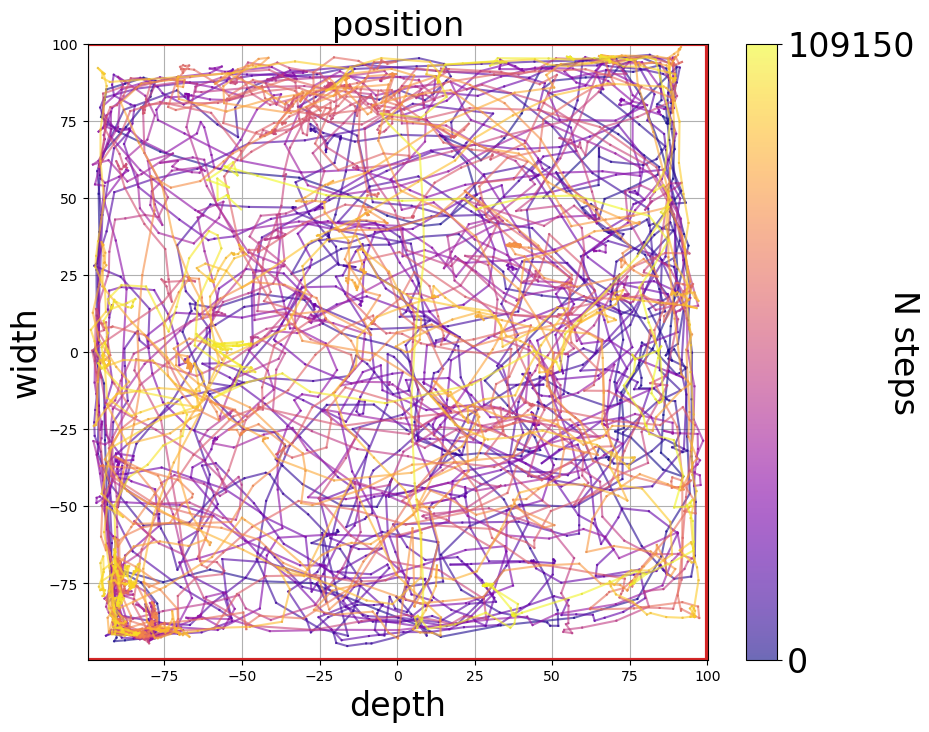

In [3]:
data.show_data()
data.plot_recording_tetr(290,save_path='/Users/clementine/Documents/UCL/lectures/NeuralPlayground/examples/experimental_examples/plot_1')
data.plot_recording_tetr(291,save_path='/Users/clementine/Documents/UCL/lectures/NeuralPlayground/examples/experimental_examples_2')
data.plot_trajectory(2)

/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/experiments/wernle_2018_data.py:366: UserWarning: This index does not have position data
  warnings.warn("This index does not have position data")


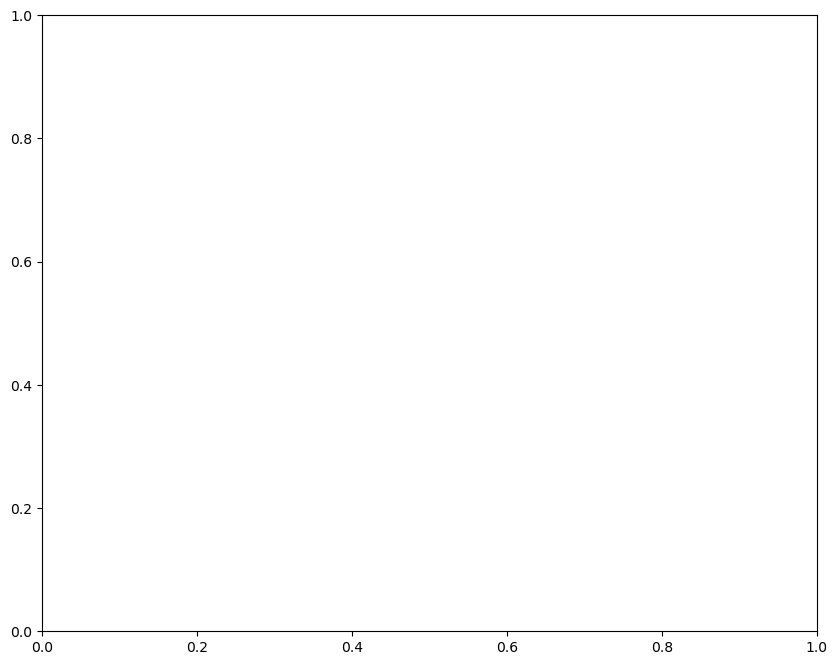

In [4]:
data.plot_trajectory(290)

In [5]:
data.plot_development(n_cells=2, time_interval=(0, 10), skip_every=10)

TypeError: Wernle2018Data.plot_development() got an unexpected keyword argument 'skip_every'

In [ ]:
data.plot_cell_comparison(session_index=(125, 126))


In [ ]:
f, ax = plt.subplots(4, 6, figsize=(4*6, 4*4))
for j in range(4):
    spikes = data.spikes_AB[j+5, 0][:, 0]
    pos = data.pos_AB[j+5, 0]
    ratemap = OnlineRateMap(spikes=spikes, position=pos, size=(100, 100))
    for i in range(6):
        rm = ratemap.update_ratemap(dt=5*60, interp_factor=1)
        ax[j, i].imshow(rm, cmap="jet")

plt.show()